In [2]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import re

In [2]:
def parse_xml(df, file,folder_path):
    # create the full file path
    file_path = os.path.join(folder_path, "en", file)
    
    # check if the file exists before attempting to parse
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None

    # parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # extract all document text in the <document> tags
    documents = root.findall(".//document")
    tweet_text = " ".join([doc.text for doc in documents])  # combine all <document> texts into one string

    # remove newline characters
    tweet_text = tweet_text.replace("\n", " ").replace("\r", " ")
    
    # remove numbers like '1:7'
    tweet_text = re.sub(r'\b\d+:\d+\b', '', tweet_text)

    filename = file.split(".xml")[0]
    # get species label from training_df based on the filename
    species_label = df[df["file"] == filename]["species"].values
    gender_label = df[df["file"] == filename]["gender"].values
    
    if len(species_label) > 0:
        species_label = species_label[0]  # extract the species label (assuming there is only one match)
    else:
        species_label = None  # in case no match is found

    if len(gender_label) > 0:
        gender_label = gender_label[0]  # extract the species label (assuming there is only one match)
    else:
        gender_label = None  # in case no match is found
    
    # return the extracted tweet and label
    return {"tweet": tweet_text, "label": species_label, "gender": gender_label}

In [3]:
# path to the folder
folder_path = 'pan19-training/'

training_df = pd.read_csv(folder_path+"label-en/truth.txt", sep=":::", names=["file","species","gender"])
print(training_df.head())

# initialize a list to store the data
csv_data = []

# loop through files in the "en" directory
for file in os.listdir(folder_path + "en"):
    parsed_data = parse_xml(training_df, file, folder_path)
    if parsed_data:  # check if the data was parsed successfully
        csv_data.append(parsed_data)

# create a DataFrame from the parsed data
output_df = pd.DataFrame(csv_data)

# save the DataFrame to a CSV file
output_df.to_csv("training.csv", encoding="utf-8", index=False)

output_df.head()


/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_6824/2652867566.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  training_df = pd.read_csv(folder_path+"label-en/truth.txt", sep=":::", names=["file","species","gender"])


                               file species gender
0  b2d5748083d6fdffec6c2d68d4d4442d     bot    bot
1   2bed15d46872169dc7deaf8d2b43a56     bot    bot
2  25395a7dbd2caa3d828bb3dbd57d8857     bot    bot
3  1c9f161414334b286c4dc70163744390     bot    bot
4  1da1f87b3dc778f28268eec70ce94f19     bot    bot


,tweet,label,gender
0,Alex is too nice for love island :( RT @STVNew...,human,female
1,RT @AlexanderRugaev: The Crypto Finance Ecosys...,human,female
2,Check out these awesome cooking t-shirts &amp;...,bot,bot
3,YEWWinfo Tiny Nanoparticles to Treat a Huge Pr...,bot,bot
4,Sr. Project Manager Water / Wastewater Enginee...,bot,bot


In [4]:
# oath to the folder
folder_path = 'pan19-test/'

test_df = pd.read_csv(folder_path+"label-en/truth.txt", sep=":::", names=["file","species","gender"])
print(training_df.head())

# initialize a list to store the data
csv_data = []

# loop through files in the "en" directory
for file in os.listdir(folder_path + "en"):
    parsed_data = parse_xml(test_df, file, folder_path)
    if parsed_data:  # check if the data was parsed successfully
        csv_data.append(parsed_data)

# create a DataFrame from the parsed data
output_df = pd.DataFrame(csv_data)

# save the DataFrame to a CSV file
output_df.to_csv("test.csv", encoding="utf-8", index=False)

output_df.head()


/var/folders/xr/8_04k68n67g0rjkj679cscmh0000gn/T/ipykernel_6824/1318128273.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv(folder_path+"label-en/truth.txt", sep=":::", names=["file","species","gender"])


                               file species gender
0  b2d5748083d6fdffec6c2d68d4d4442d     bot    bot
1   2bed15d46872169dc7deaf8d2b43a56     bot    bot
2  25395a7dbd2caa3d828bb3dbd57d8857     bot    bot
3  1c9f161414334b286c4dc70163744390     bot    bot
4  1da1f87b3dc778f28268eec70ce94f19     bot    bot


,tweet,label,gender
0,Her attitude was: If you're on her mom. This t...,bot,bot
1,RT @africanstudies: Book launch today for @Mag...,human,female
2,"On Thursday at 10.30 am in Edinburgh, roundtab...",human,female
3,RT @francescrook: New Italian law shortens pri...,human,female
4,Shit bags had #POR ht #USA ft 35/1 Brian Kerr ...,human,male


In [5]:
import pandas as pd
import re

# Regular expression to detect emojis (i let chaptgpt create these patterns)
emoji_pattern = re.compile(
    "["  
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # geometric shapes
    "\U0001F800-\U0001F8FF"  # supplemental arrows
    "\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
    "\U0001FA00-\U0001FA6F"  # chess symbols
    "\U0001FA70-\U0001FAFF"  # symbols and pictographs
    "\U00002702-\U000027B0"  # dingbats
    "\U000024C2-\U0001F251"  # enclosed characters
    "]", flags=re.UNICODE)


# load the CSV data into a pandas DataFrame for the training set
df = pd.read_csv('training.csv')

# function to clean tweets: replace mentions, URLs, hashtags, remove multiple spaces, and lowercase
def clean_tweet(tweet):
    tweet = tweet.lower()  # convert tweet to lowercase
    # replace hashtags with the word "HASHTAG"
    tweet = re.sub(r'#\S+', 'HASHTAG ', tweet)
    # replace URLs with the word "URL"
    tweet = re.sub(r'http[s]?://\S+', 'URL ', tweet)  # for URLs starting with http:// or https://
    tweet = re.sub(r'www\S+', 'URL ', tweet)  # for URLs starting with www
    # replace mentions with the word "MENTION"
    tweet = re.sub(r'@\S+', 'MENTION ', tweet)  # for mentions like @username
    # replace emojis with the word "EMOJI"
    tweet = re.sub(emoji_pattern, 'EMOJI ', tweet)
    # remove extra spaces and leading/trailing spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # replace multiple spaces with a single space
    return tweet

# apply the cleaning function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_tweet)

# display the cleaned dataframe
print(df.head())

# save the cleaned DataFrame back to a new CSV file
df.to_csv('cleaned_training.csv', index=False)

# load the CSV data into a pandas DataFrame for the test set
df_test = pd.read_csv('test.csv')

# apply the cleaning function to the 'tweet' column
df_test['tweet'] = df_test['tweet'].apply(clean_tweet)

# display the cleaned dataframe
print(df_test.head())

# save the cleaned DataFrame back to a new CSV file
df_test.to_csv('cleaned_test.csv', index=False)


                                               tweet  label  gender
0  alex is too nice for love island :( rt MENTION...  human  female
1  rt MENTION the crypto finance ecosystem by MEN...  human  female
2  check out these awesome cooking t-shirts &amp;...    bot     bot
3  yewwinfo tiny nanoparticles to treat a huge pr...    bot     bot
4  sr. project manager water / wastewater enginee...    bot     bot
                                               tweet  label  gender
0  her attitude was: if you're on her mom. this t...    bot     bot
1  rt MENTION book launch today for MENTION in cm...  human  female
2  on thursday at 10.30 am in edinburgh, roundtab...  human  female
3  rt MENTION new italian law shortens prison sen...  human  female
4  shit bags had HASHTAG ht HASHTAG ft 35/1 brian...  human    male


In [4]:
import pandas as pd
import re
import nltk
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

# define sexual/swear words (example list) (i generated them by chatgpt using: "give me a list of swearwords, also with ways that people write them online like b00bies and so on" on 04.10.2024, 14:10)
swear_words = set([
    # common swear words
    "damn", "hell", "crap", "shit", "fuck", "bitch", "bastard", "asshole", "dick", "piss", 
    "whore", "slut", "cunt", "freak", "prick", "arse", "bloody", "bugger",
    
    # variants and online spellings
    "f*ck", "sh*t", "b*tch", "a**hole", "b@stard", "d@mn", "h3ll",
    "d1ck", "f@ck", "sht", "bch", "cnt", "wh0re", "sl*t", "a$$", "d@mmit",

    # creative leetspeak or text variants
    "b00bs", "b00bies", "fuk", "fukk", "sh1t", "fuq", "biatch", "beeyotch", 
    "a55", "azzhole", "azz", "mofo", "muthafucka", "mutha", "phuck", 
    "phuq", "phuk", "c*nt", "n00b", "wtf", "lmfao", "lmao", 
    "omfg", "gtfo", "wth", "wtaf", "douchebag", "douchetard", 

    # sexually explicit terms and slurs
    "boobies", "boobs", "tits", "tit", "dong", "dildo", "blowjob", 
    "handjob", "anal", "buttplug", "clit", "cum", "cummies", "vagina", 
    "penis", "sex", "sexy", "threesome", "orgy", "masturbate", 
    "porn", "porno", "p0rn", "s3x", "horny", "lust", "nsfw",

    # regional or culturally significant terms
    "tosser", "wanker", "knob", "bellend", "pillock", "git", "twat", 
    "plonker", "shagger", "gobshite", "scumbag", 

    # racist or bigoted terms
    "n*gga", "n*gger", "chink", "f*ggot", "k*ke", "sp*c", "cracker", 
    "wetback", "paki", "sandn*gger", "raghead", "gook", "69","420","fk","fkin"

])

# function to count word types using NLTK's POS tagging
def pos_counts(tweet):
    tokens = word_tokenize(tweet)
    pos_tags = nltk.pos_tag(tokens)
    noun_count = sum(1 for _, pos in pos_tags if pos.startswith('NN'))  # nouns
    verb_count = sum(1 for _, pos in pos_tags if pos.startswith('VB'))  # verbs
    adjective_count = sum(1 for _, pos in pos_tags if pos.startswith('JJ'))  # adjectives
    adverb_count = sum(1 for _, pos in pos_tags if pos.startswith('RB'))  # adverbs
    return noun_count, verb_count, adjective_count, adverb_count

# function to extract features from a single tweet
def extract_features(tweet):
    # sentence count and average sentence length
    sentences = nltk.sent_tokenize(tweet)
    sentence_count = len(sentences)
    avg_sentence_length = len(tweet.split()) / sentence_count if sentence_count > 0 else 0

    # tweet length
    tweet_length = len(tweet.split())

    # count hashtags, emojis, URLs, mentions
    hashtag_count = len(re.findall(r'HASHTAG', tweet))
    emoji_count = len(re.findall(r'EMOJI', tweet))
    url_count = len(re.findall(r'URL', tweet))
    mention_count = len(re.findall(r'MENTION', tweet))

    # part-of-speech counts
    noun_count, verb_count, adjective_count, adverb_count = pos_counts(tweet)

    # sentiment analysis
    sentiment = TextBlob(tweet).sentiment.polarity

    # count swear words
    swear_count = sum(1 for word in tweet.split() if word in swear_words)

    return {
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length,
        'tweet_length': tweet_length,
        'hashtag_count': hashtag_count,
        'emoji_count': emoji_count,
        'url_count': url_count,
        'mention_count': mention_count,
        'noun_count': noun_count,
        'verb_count': verb_count,
        'adjective_count': adjective_count,
        'adverb_count': adverb_count,
        'sentiment': sentiment,
        'swear_count': swear_count
    }

# load cleaned data
df = pd.read_csv('cleaned_training.csv')

# extract features for each tweet
features = df['tweet'].apply(extract_features)

# convert extracted features into a DataFrame
features_df = pd.DataFrame(list(features))

# combine features with the original data
df_features = pd.concat([df, features_df], axis=1)

# save to a new CSV file
df_features.to_csv('tweets_with_features.csv', index=False)

# display the dataframe with extracted features
print(df_features.head())


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


                                               tweet  label  gender   
0  alex is too nice for love island :( rt MENTION...  human  female  \
1  rt MENTION the crypto finance ecosystem by MEN...  human  female   
2  check out these awesome cooking t-shirts &amp;...    bot     bot   
3  yewwinfo tiny nanoparticles to treat a huge pr...    bot     bot   
4  sr. project manager water / wastewater enginee...    bot     bot   

   sentence_count  avg_sentence_length  tweet_length  hashtag_count   
0              27            44.592593          1204              3  \
1              83            21.506024          1785             73   
2              77            16.610390          1279              0   
3              36            50.555556          1820              1   
4              86            42.767442          3678              2   

   emoji_count  url_count  mention_count  noun_count  verb_count   
0           76         23            102         502         200  \
1         

In [5]:
# load cleaned data
df_test = pd.read_csv('cleaned_test.csv')

# extract features for each tweet
features_test = df_test['tweet'].apply(extract_features)

# convert extracted features into a DataFrame
features_df_test = pd.DataFrame(list(features_test))

# combine features with the original data
df_features_test = pd.concat([df_test, features_df_test], axis=1)

# save to a new CSV file
df_features_test.to_csv('tweets_with_features_test.csv', index=False)

# display the dataframe with extracted features
print(df_features_test.head())


                                               tweet  label  gender   
0  her attitude was: if you're on her mom. this t...    bot     bot  \
1  rt MENTION book launch today for MENTION in cm...  human  female   
2  on thursday at 10.30 am in edinburgh, roundtab...  human  female   
3  rt MENTION new italian law shortens prison sen...  human  female   
4  shit bags had HASHTAG ht HASHTAG ft 35/1 brian...  human    male   

   sentence_count  avg_sentence_length  tweet_length  hashtag_count   
0              87            11.977011          1042              0  \
1              63            26.730159          1684             34   
2              70            22.242857          1557             25   
3              65            23.553846          1531             36   
4              93            13.172043          1225             47   

   emoji_count  url_count  mention_count  noun_count  verb_count   
0            1          0              0         284         204  \
1         

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# load feature data
df_features = pd.read_csv('tweets_with_features.csv')  # labeled dataset with 'label' column (1=bot, 0=human)

# separate features and labels
X = df_features.drop(columns=['label', 'tweet', 'gender'])  # Drop label, tweet, and gender columns
y = df_features['label']  # Label: 1 for bot, 0 for human

# split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39, stratify=y)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# train a Random Forest Classifier
clf = RandomForestClassifier(random_state=39, n_estimators=100)
clf.fit(X_train, y_train)

# evaluate on validation data
y_pred = clf.predict(X_val)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))


Confusion Matrix:
 [[391  21]
 [  8 404]]
Classification Report:
               precision    recall  f1-score   support

         bot       0.98      0.95      0.96       412
       human       0.95      0.98      0.97       412

    accuracy                           0.96       824
   macro avg       0.97      0.96      0.96       824
weighted avg       0.97      0.96      0.96       824

Accuracy Score: 0.9648058252427184



Top Features:
                Feature  Importance
6         mention_count    0.377073
5             url_count    0.151742
3         hashtag_count    0.106911
4           emoji_count    0.092168
7            noun_count    0.061852
10         adverb_count    0.042161
1   avg_sentence_length    0.037223
2          tweet_length    0.025979
9       adjective_count    0.024815
0        sentence_count    0.024279


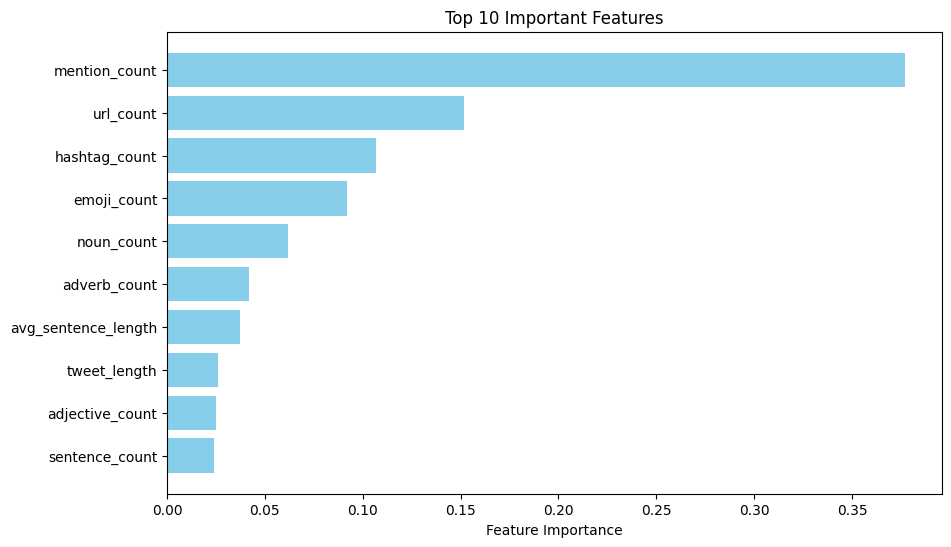

                                               tweet  label  gender   
0  her attitude was: if you're on her mom. this t...    bot     bot  \
1  rt MENTION book launch today for MENTION in cm...  human  female   
2  on thursday at 10.30 am in edinburgh, roundtab...  human  female   
3  rt MENTION new italian law shortens prison sen...  human  female   
4  shit bags had HASHTAG ht HASHTAG ft 35/1 brian...  human    male   

   sentence_count  avg_sentence_length  tweet_length  hashtag_count   
0              87            11.977011          1042              0  \
1              63            26.730159          1684             34   
2              70            22.242857          1557             25   
3              65            23.553846          1531             36   
4              93            13.172043          1225             47   

   emoji_count  url_count  mention_count  noun_count  verb_count   
0            1          0              0         284         204  \
1         

In [7]:
import matplotlib.pyplot as plt

# print feature importance
feature_importance = clf.feature_importances_
# get feature names after excluding columns like 'label', 'tweet', and 'gender'
features = X_train.columns if isinstance(X_train, pd.DataFrame) else df_features.drop(columns=['label', 'tweet', 'gender']).columns

# check alignment between features and feature importance
if len(features) != len(feature_importance):
    raise ValueError(f"Mismatch: {len(features)} features but {len(feature_importance)} importance values.")

# create the DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(importance_df.head(10))

# plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # invert to display most important features at the top
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.show()


# load test dataset
df_test = pd.read_csv('tweets_with_features_test.csv')  # test dataset with same features as training
# test data: separate features and target
X_test = df_test.drop(columns=['tweet', 'gender', 'label'])
y_test = df_test['label']  # ground truth for evaluation

# scale test features
X_test = scaler.transform(X_test)

# predict on test data
test_predictions = clf.predict(X_test)

# add predictions to the test dataframe
df_test['predicted_label'] = test_predictions

# save predictions to a CSV file
df_test.to_csv('test_with_predictions_rf.csv', index=False)

print(df_test.head())


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, test_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

         bot       0.93      0.91      0.92      1320
       human       0.91      0.93      0.92      1320

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Confusion Matrix:
[[1199  121]
 [  94 1226]]
Accuracy: 0.92


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# function to extract top N-grams (1 to 3 grams) indicative of bot or human
def extract_top_ngrams(df, label_column, ngram_range=(1, 3), top_n=25):
    # initialize CountVectorizer with ngram_range from 1 to 3
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    
    # split data by label (bot and human)
    df_bot = df[df[label_column] == 'bot']  # filter bot data
    df_human = df[df[label_column] == 'human']  # filter human data

    # transform the tweets from each label into n-grams
    X_bot = vectorizer.fit_transform(df_bot['tweet'])
    X_human = vectorizer.transform(df_human['tweet'])
    
    # get n-gram counts and corresponding feature names for bot and human
    ngram_counts_bot = X_bot.sum(axis=0).A1
    ngram_counts_human = X_human.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()

    # create DataFrames for bot and human n-grams and their counts
    ngram_df_bot = pd.DataFrame(list(zip(ngram_vocab, ngram_counts_bot)), columns=['ngram', 'count'])
    ngram_df_human = pd.DataFrame(list(zip(ngram_vocab, ngram_counts_human)), columns=['ngram', 'count'])

    # sort by frequency of occurrence and select top ngrams for bot and human
    top_ngrams_bot = ngram_df_bot.sort_values(by='count', ascending=False).head(top_n)
    top_ngrams_human = ngram_df_human.sort_values(by='count', ascending=False).head(top_n)

    return top_ngrams_bot, top_ngrams_human

# load the cleaned training data
df = pd.read_csv('cleaned_training.csv')

# extract top 25 n-grams for bot and human
top_ngrams_bot, top_ngrams_human = extract_top_ngrams(df, 'label', ngram_range=(1, 3), top_n=50)

# remove the index column from the DataFrame by resetting the index and dropping it
ngram_df_bot_reset = top_ngrams_bot.reset_index(drop=True)
ngram_df_human_reset = top_ngrams_human.reset_index(drop=True)

# now print the cleaned n-grams without the index column
print("Top 50 indicative n-grams for Bot:")
print(ngram_df_bot_reset)

print("\nTop 50 indicative n-grams for Human:")
print(ngram_df_human_reset)



Top 50 indicative n-grams for Bot:
                      ngram   count
0                       url  176841
1                     emoji  101983
2                   hashtag   97447
3               emoji emoji   85463
4         emoji emoji emoji   78040
5           hashtag hashtag   55794
6                   url url   46590
7   hashtag hashtag hashtag   38042
8                   mention   33422
9                       job   15092
10                       rt   14982
11                developer   14081
12               rt mention   13306
13                 engineer   12630
14                 software   11581
15            emoji hashtag   10145
16              hashtag url    9779
17                      amp    9554
18              url hashtag    8831
19                      new    8207
20                   senior    7378
21                    trump    7242
22                url emoji    7131
23              description    6896
24                     time    6847
25                   url rt  


=== Logistic Regression ===
Predictions saved to test_with_predictions_logistic_regression.csv

Classification Report:
              precision    recall  f1-score   support

         bot       0.89      0.84      0.87      1320
       human       0.85      0.90      0.87      1320

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640

Confusion Matrix:
[[1106  214]
 [ 130 1190]]
Accuracy: 0.87

Top Features:
            Feature  Importance
4       emoji_count    4.261835
6     mention_count    2.358448
10     adverb_count    0.892046
12      swear_count    0.233080
5         url_count    0.216040
9   adjective_count    0.213664
8        verb_count    0.158650
11        sentiment   -0.161115
3     hashtag_count   -0.193265
0    sentence_count   -0.352448


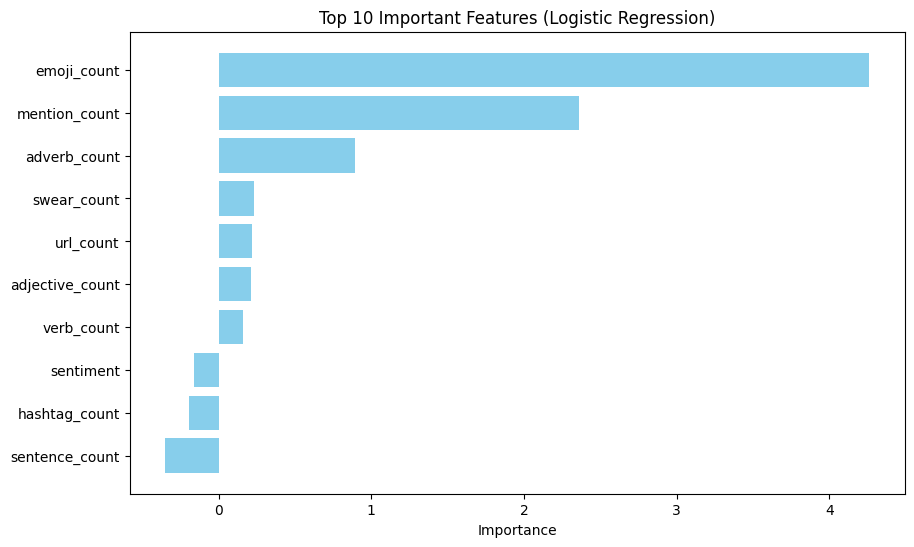


=== Random Forest ===
Predictions saved to test_with_predictions_random_forest.csv

Classification Report:
              precision    recall  f1-score   support

         bot       0.93      0.91      0.92      1320
       human       0.91      0.93      0.92      1320

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Confusion Matrix:
[[1199  121]
 [  94 1226]]
Accuracy: 0.92

Top Features:
                Feature  Importance
6         mention_count    0.377073
5             url_count    0.151742
3         hashtag_count    0.106911
4           emoji_count    0.092168
7            noun_count    0.061852
10         adverb_count    0.042161
1   avg_sentence_length    0.037223
2          tweet_length    0.025979
9       adjective_count    0.024815
0        sentence_count    0.024279


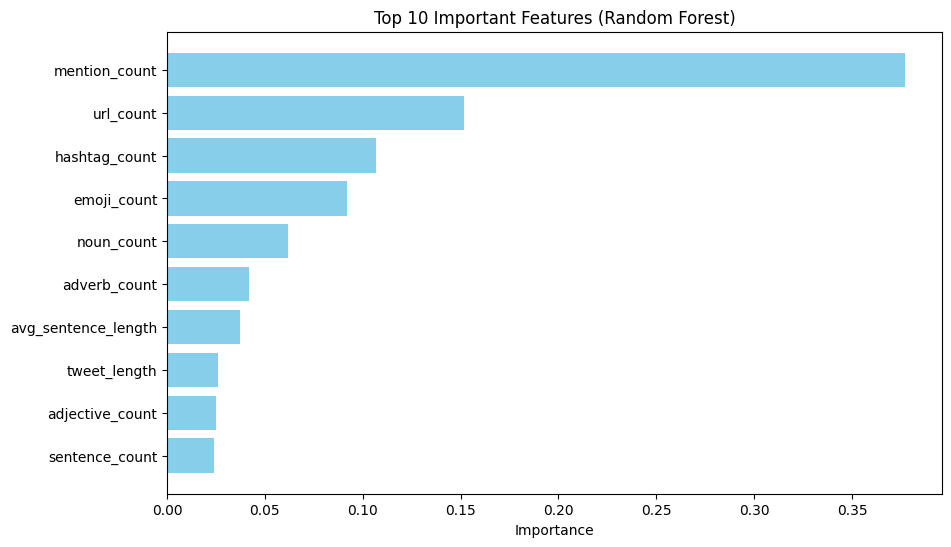


=== Support Vector Machine ===
Predictions saved to test_with_predictions_support_vector_machine.csv

Classification Report:
              precision    recall  f1-score   support

         bot       0.91      0.85      0.88      1320
       human       0.86      0.91      0.88      1320

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

Confusion Matrix:
[[1117  203]
 [ 113 1207]]
Accuracy: 0.88

Top Features:
                Feature  Importance
1   avg_sentence_length    3.004922
4           emoji_count    2.032410
6         mention_count    1.508970
10         adverb_count    0.461558
2          tweet_length    0.345898
0        sentence_count    0.246455
12          swear_count    0.169294
3         hashtag_count    0.143066
5             url_count    0.134815
9       adjective_count    0.131621


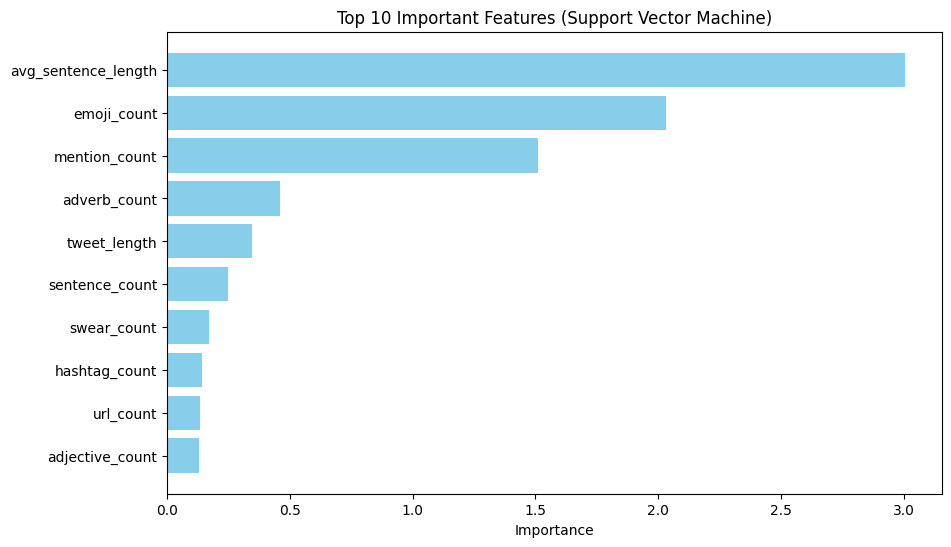


=== Gradient Boosting Classifier ===
Predictions saved to test_with_predictions_gradient_boosting_classifier.csv

Classification Report:
              precision    recall  f1-score   support

         bot       0.93      0.90      0.92      1320
       human       0.90      0.94      0.92      1320

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Confusion Matrix:
[[1186  134]
 [  84 1236]]
Accuracy: 0.92

Top Features:
                Feature  Importance
6         mention_count    0.792697
5             url_count    0.099456
3         hashtag_count    0.038083
7            noun_count    0.016051
10         adverb_count    0.011910
4           emoji_count    0.010465
9       adjective_count    0.007231
11            sentiment    0.007076
1   avg_sentence_length    0.004373
12          swear_count    0.004087


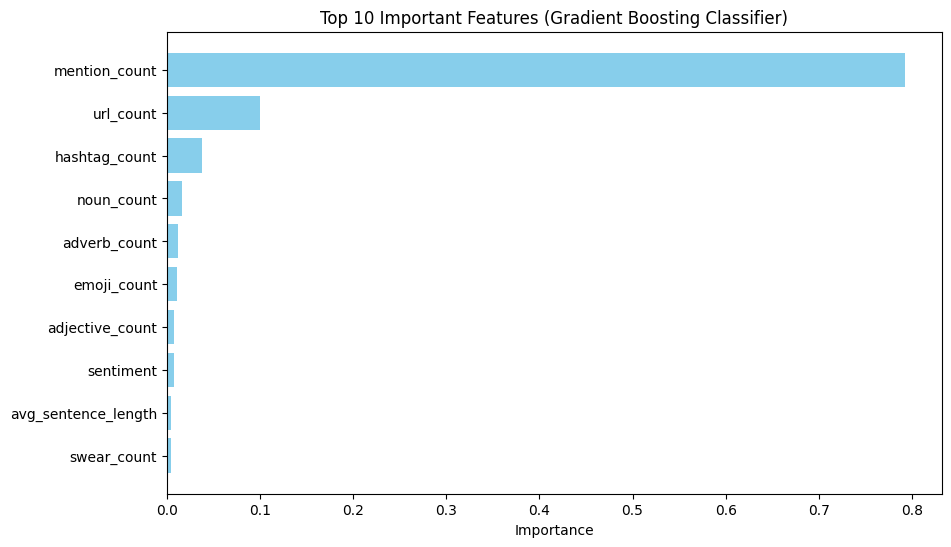

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load feature data
df_features = pd.read_csv('tweets_with_features.csv')

# separate features and labels
X = df_features.drop(columns=['label', 'tweet', 'gender'])  # drop label, tweet, and gender columns
y = df_features['label']  # label: 1 for bot, 0 for human

# split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39, stratify=y)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# load test set
df_test = pd.read_csv('tweets_with_features_test.csv')
X_test = df_test.drop(columns=['tweet', 'gender', 'label'])
y_test = df_test['label']
X_test = scaler.transform(X_test)  # scale test features

# initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=39, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=39, n_estimators=100),
    "Support Vector Machine": SVC(random_state=39, kernel='linear', probability=True),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=39)
}

# train, evaluate, and save results
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    
    # train the model
    model.fit(X_train, y_train)

    # tredict on test data
    test_predictions = model.predict(X_test)
    df_test['predicted_label'] = test_predictions
    
    # save predictions to a CSV file
    output_file = f'test_with_predictions_{model_name.replace(" ", "_").lower()}.csv'
    df_test.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

    # evaluate the model on test data
    print("\nClassification Report:")
    print(classification_report(y_test, test_predictions))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, test_predictions))

    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # feature importance analysis
    print("\nTop Features:")

    if model_name == "Logistic Regression":
        # for LR, use coefficients
        coefficients = model.coef_[0]
        features = X.columns
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': coefficients
        }).sort_values(by='Importance', ascending=False)
    
    elif model_name == "Support Vector Machine":
        # for SVM, use absolute coefficients
        coefficients = model.coef_[0]
        features = X.columns
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': abs(coefficients)
        }).sort_values(by='Importance', ascending=False)
    
    else:
        # for tree-based models, use feature_importances_
        feature_importances = model.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

    # display top 10 features
    print(importance_df.head(10))

    # plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Top 10 Important Features ({model_name})')
    plt.xlabel('Importance')
    plt.show()
